2024-11-12 21:17:45.442549: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-12 21:17:45.660471: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-12 21:17:45.769689: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-12 21:17:45.800444: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-12 21:17:45.938128: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8156 - loss: 0.5956 - val_accuracy: 0.9542 - val_loss: 0.1483
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9485 - loss: 0.1791 - val_accuracy: 0.9628 - val_loss: 0.1215
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9592 - loss: 0.1354 - val_accuracy: 0.9693 - val_loss: 0.0990
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9649 - loss: 0.1147 - val_accuracy: 0.9709 - val_loss: 0.0912
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9704 - loss: 0.1014 - val_accuracy: 0.9747 - val_loss: 0.0846
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9728 - loss: 0.0849 - val_accuracy: 0.9760 - val_loss: 0.0825
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9759 - loss: 0.0760 - val_accuracy: 0.9739 - val_loss: 0.0894
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9786 - loss: 0.0704 - 

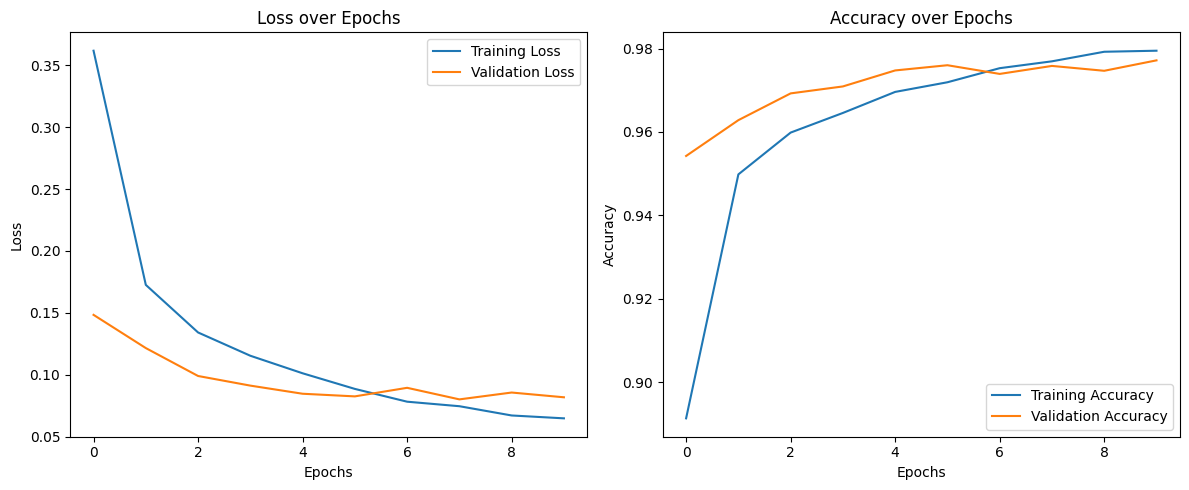

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
[[ 968    0    1    0    0    0    6    1    4    0]
 [   0 1119    4    2    0    1    2    0    6    1]
 [   1    0 1010    1    1    0    3    8    8    0]
 [   0    0    5  990    0    4    0    7    3    1]
 [   0    0    3    0  961    0    6    1    0   11]
 [   1    0    0    8    1  869    4    3    2    4]
 [   3    2    0    0    2    4  944    0    3    0]
 [   0    1    7    3    0    0    0 1010    1    6]
 [   5    0    2    5    3    5    4    6  937    7]
 [   1    2    0    6   15    2    0    7    0  976]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
        

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Dataset Acquisition
# Load MNIST dataset from Keras
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Step 2: Data Preprocessing
# Normalize pixel values to the range [0, 1]
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# Flatten 28x28 images into 1D arrays (784 elements)
x_train_full = x_train_full.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Step 3: Data Splitting (Split into training, validation, and test sets)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# Step 4: Model Architecture
# Build the MLP model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28*28,)),  # Input layer (784) + 1st hidden layer (128 neurons)
    layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    layers.Dense(64, activation='relu'),  # 2nd hidden layer (64 neurons)
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')  # Output layer (10 neurons for 10 classes)
])

# Step 5: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Suitable for integer labels (0-9)
              metrics=['accuracy'])

# Step 6: Training
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(x_val, y_val))

# Step 7: Evaluation on the Test Set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Step 8: Model Fine-tuning (Optional)
# You can experiment with architectures and hyperparameters like adding more layers or neurons.

# Step 9: Visualization
# Plot the training and validation loss/accuracy over epochs
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Step 10: Confusion Matrix and Classification Report
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))